## RCES 2018 Final Project
## A coral-based sea level curve for Barbados over MIS 5 
### Miranda Cashman (mc4428)

Using the Hibbert et al., 2016 coral database for sea level reconstructions, I have created a suite of sea level curves for the island of Barbados over MIS 5 (70 ka to 135 ka).  I have produced 4 sea level curves, each using a different assumption about sea level during MIS 5e (The Last Interglacial, 115 ka to 130 ka), which was used to calculate the uplift rate of the island.  Therefore, each sea level curve uses a different calculated uplift rate.  


#### References
Hibbert et al., 2016

Thompson and Goldstein 2005

O'Leary et al., 2013

Cutler et al., 2003

In [1]:
#Import relevant pacakges 
import numpy as np
import pandas as pd
import xarray as xr
import cartopy.crs as ccrs
import cartopy.feature as cfeature
from matplotlib import pyplot as plt
%matplotlib inline 

#I downloaded an excel file reader:
import xlrd

In [2]:
#Download link for the data
! wget 'https://ars.els-cdn.com/content/image/1-s2.0-S0277379116301305-mmc1.xlsx'

--2018-12-04 01:54:41--  https://ars.els-cdn.com/content/image/1-s2.0-S0277379116301305-mmc1.xlsx
Resolving ars.els-cdn.com (ars.els-cdn.com)... 184.28.79.64
Connecting to ars.els-cdn.com (ars.els-cdn.com)|184.28.79.64|:443... connected.
HTTP request sent, awaiting response... 200 OK
Length: 2093003 (2.0M) [application/excel]
Saving to: ‘1-s2.0-S0277379116301305-mmc1.xlsx’

1-s2.0-S02773791163 100%[===================>]   2.00M  7.42MB/s    in 0.3s    

2018-12-04 01:54:42 (7.42 MB/s) - ‘1-s2.0-S0277379116301305-mmc1.xlsx’ saved [2093003/2093003]



### Loading and Cleaning Data
The Hibbert et al., 2016 data was never meant to be loaded into a program and so it required extra steps to open and clean the dataset before I could use it.

#### Methods:
- Load xlsx with xlrd reader and define NaN values (there are many keywords that I listed as NaN values)
- Create a new dataframe of just Barbados data
- Delete unwanted/unneeded columns 
- On relevant parameters, renamed to remove spaces in the column headers 
- Changed the datatype from objects or strings to float type on columns with numerical data

In [2]:
#reading the excel document into a Pandas dataframe
hibbert_ds = pd.read_excel('1-s2.0-S0277379116301305-mmc1.xlsx', sheet_name ='Database', na_values=['unknown', 'not reported', 
                                                        ' not reported', 'not reported ', "can't calculate", 
                                                        "unknown (can't calculate)", "no specific info; info for averaged replicates.",
                                                        'infinite', 'INFINITE', '>400', np.nan])
#Creating a new dataframe of just Barbados data
barbados = hibbert_ds[hibbert_ds.Location == 'Barbados']

In [ ]:
 'Uplift reported in original references',
 'Uplift error reported in original references',
 'Uplift rate Used        ',
 'Uplift rate Error used        ',
 'Facies',

 '[232Th ] uncert. (±2σ) ',

 '[230Th/238U]ACT back calculated?',
 '[234U/238U]ACT back-calculated?',
 'Reported age (ka)',
 'Reported age uncert. (±2σ)',
 'Reported ẟ234U initial uncert. (±2σ)',
 'Zcp', 
    'Zcp uncert. (±2σ)', 

In [3]:
#Delete unneeded columns
barbados = barbados.drop(columns=['ID', 'Source', 'Latitude', 'Longitude', 'Tectonic Category', 'Comments (uplift)', 'Original elevation datum used', 
                      'How elevation derived?', 'Elevation uncertainty reported in original references', 'Elevation obtained from other references',
                      'Elevation uncertainty reported in other references', 'Comments (elevation)', 'Comments (elevation error)',
                      'Explicitly state reef crest/top targeted in original sampling?', 'additional sample information', 
                      'Stratigraphic constraints available?', 'Species', 'Comments (species)', 'Median depth (m)', 'lower error (95%)',
                      'upper error (95%)', 'lower error (68%)', 'upper error (68%)', 
                       'modern depth distribution (assemblage or other) study undertaken? ', 
                       'type (coral, coralgal, foram, modern depth distribution etc.)', 'scale (site, local, regional)', 
                       'given assemblage (as originally reported)', 'Fossil assemblage (or principal faunal composition) study undertaken? ',
                      'original palaeo-depth interpretation', 'used in original palaeo sea level reconstruction (or error)?',
                      'Replicate', 'comments (replicate)', 'Pa/Th age?', '14C age?', 'Instrument', 'Decay cnsts', 'comments (decay constant)',
                      'Spike Calib', 'comments (spike calibration)', '% calcite', 'determined by', '(232Th /238U)*10^5', '[238U] (ppm)',
                      '[238U] uncert. (±2σ)', '[230Th/234U]ACT', '[230Th/234U]ACT uncert. (±2σ)', 'Reported age comments', 
                       'Recalculated [230Th/238U]ACT', 'Recalculated [230Th/238U]ACT uncert. (±2σ)', 'Recalculated [234U/238U]ACT',
                       'Recalculated [234U/238U]ACT uncert. (±2σ)', 'Recalculated Conventional Age (ka)', 'Comment (age and δ234Uinitial)',
                       'Recalculated Conventional Age uncert. (±2σ)', 'Recalculated Conventional Age uncert. (±1σ)', 
                       'Recalculated Conventional Age uncert. (±2σ) includes decay cnst. uncert.', 
                       'Recalculated Conventional Age uncert. (±1σ) includes decay cnst. uncert.', 'Recalculated ẟ234U initial (‰)',
                       'Recalculated ẟ234U initial uncert. (±2σ)', 'Recalculated ẟ234U initial uncert. (±2σ) includes decay cnst. uncert.',
                       'Zcp Comments', 'PRSL (m)', '+3σPRSL ', '-3σPRSL ', '+2σPRSL', '-2σPRSL', '+1σPRSL', '-1σPRSL',
                       'PRSL Comments (in addition to Zcp comments)']);

#Rename columns
barbados = barbados.rename(index=str, columns={'Elevation Used (m)': 'elevation', 
                                                   'Elevation reported in orignial reference': 'ele_ref', 
                                                   'Elevation uncertainty used (m)': 'ele_uncert',
                                                   'decimal latitude': 'dec_lat',
                                                   'decimal longitude': 'dec_lon',
                                                   'Reported ẟ234U initial (‰)': 'd234U_i',
                                                   'Reported [230Th/238U]ACT': 'Th230_U238_act_ref',
                                                   'Reported [230Th/238U]ACT uncert. (±2σ)': 'Th230_U238_act_2sig_ref',
                                                   '[230Th/238U]ACT back calculated?': 'Th230_U238_bc',
                                                   'Reported [234U/238U]ACT': 'U234_U238_act_ref',
                                                   'Reported [234U/238U]ACT uncert. (±2σ)': 'U234_U238_act_2sig_ref',
                                                   'Terrace Identification': 'terrace', 'in growth position (Y/N)': 'growth_pos', 
                                                    'in situ': 'insitu', '[232Th ] (ppb)': 'Th232'})

#Convert to numeric data type
headers = ["elevation", "ele_uncert", "dec_lat", "dec_lon", "d234U_i", "Th230_U238_act_ref", "Th230_U238_act_2sig_ref",
          "U234_U238_act_ref", "U234_U238_act_2sig_ref"]
barbados[headers] = barbados[headers].apply(pd.to_numeric)

### Age Calculation 
Each sample in the dataframe have isotopic data, specifically the activity ratios of 234U/238U and 230Th/238U.  From these two ratios, we can calculate the age of the samples.  While the Hibbert dataset has their own recalculated ages, I wanted to recalculate the ages myself.  The age calculation differs depending on if the coral displays "open system" or "closed system" behavior.  If a sample is closed system, this means there was no diagenetic alteration of the isotopes, and therefore the isotopes accurately yield the age of the sample.  If the sample is openy system, this means that there has been alteration to the isotope ratios and therefore the age calculation could yield false ages.  

One reliable screening method that can determine open or closed system behavior is the back-calculated d234 initial of the sample.  If the back-calculated d234 intial is within 8 per mil of modern sea water d234, we consider the coral to be 'closed system,' but if the d234 falls outside of that range, we consider it 'open system.'

#### Methods:
- Filter out any enteries without isotope ratios reported (null values)
- Filter out highly altered samples (d234 initial > 200 or < 90)
- Define an age calculator function utilizing vectorization and apply to Barbados dataframe (conv_age)
- Figure 1 shows closed system evolution of U/Th ratios assuming an initial 234U/238U of 1.1466
- Append ages to Barbados dataframe under 'conv_age' (stands for 'conventional age')
- Define a function that saves the 'true age.' For open system samples, the age will be recalculated using Thompson et al., 2003 Open System Correction (Thompson_age).  Closed system corals return the conventional age calcuatled in the part before.

In [ ]:
#If I have time, calculate the d234i myself

In [4]:
#Filter out entries with NaN values in ratio categories
barbados = barbados[pd.notnull(barbados['U234_U238_act_ref'])]
barbados = barbados[pd.notnull(barbados['Th230_U238_act_ref'])]

#Filter out very diagenetically altered data
barbados = barbados[barbados.d234U_i < 200]
barbados = barbados[barbados.d234U_i > 90]

In [5]:
#Define decay constants
L238 = 1.55125e-10 #decay constant of 238U
L234 = 2.82203e-6  #decay constant of 234U
L230 = 9.17055e-6  #decay constant of 230Th
U234_U238_SW = 1.1466  #234U/238U of seawater today (also considered intial 234U/238U)

#Create function that calculates conventional age through iteration
def conv_age(Th_U, U_U, N=barbados.shape[0]):
    all_ages = np.array([np.linspace(0, 600000, N)]*np.array(Th_U).size).T
    calc_ages = 1/-L230*np.log(1-Th_U+L230/(L230-L234)*(np.exp(-L234*all_ages)-
                                                        np.exp(-L230*all_ages))*(U_U-1)*np.exp(L234*all_ages))
    residual = abs(calc_ages - all_ages)
    ans = np.argsort(np.abs(residual), axis=0)[0,:]
    return np.diagonal(all_ages[ans])


In [6]:
#Calculate the conventional ages for all barbados samples
barbados['conv_age'] = conv_age(barbados['Th230_U238_act_ref'].values, barbados['U234_U238_act_ref'].values)

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:11: RuntimeWarning: invalid value encountered in log
  # This is added back by InteractiveShellApp.init_path()


In [7]:
def Thompson_age(d234i, conv_age, Th_U, U_U):
    if d234i > (146.8-8) and d234i < (146.8+8):
        return conv_age
    else:
        test_age = []
        ans = 3
        residual = 4
        for i in range(1, 100000):
            test_age.append(conv_age-i)
            test_age.append(conv_age+i)
        for j in range(0, len(test_age)):
            f234 = (U_U-U234_U238_SW*np.exp(-L234*test_age[j]))/(1-np.exp(-L234*test_age[j]))
            if f234 < 1:
                m = (1-f234)*(1-np.exp(-L234*test_age[j]))/((1-f234*((f234-1)*(4.754*234/4.184/230)+1))*(1-L230/(L230-L234)*np.exp(-L234*test_age[j])+L234/(L230-L234)*
                                     np.exp(-L230*test_age[j]))+(1-((f234-1)*(4.754*234/4.184/230)+1))*(L230/(L230-L234)*U234_U238_SW*
                                    (np.exp(-L234*test_age[j])-np.exp(-L230*test_age[j]))))
                Tage1 = 1/-L230*np.log(1-Th_U+L230/(L230-L234)*(U234_U238_SW-1)*(np.exp(-L234*test_age[j])-np.exp(-L230*test_age[j]))+1/m*
                                    (U_U-((U234_U238_SW-1)*np.exp(-L234*test_age[j])+1)))
                if residual > abs(Tage1 - test_age[j]):
                    residual = abs(Tage1 - test_age[j])
                    ans = test_age[j]
            elif f234 > 1:
                f234_rep = 0.975
                Lratio = 0.9730500769
                m = (1-f234_rep)*(1-np.exp(-L234*test_age[j]))/((1-f234_rep*Lratio)*(1-L230/(L230-L234)*np.exp(-L234*test_age[j])+L234/(L230-L234)*np.exp(-L230*test_age[j]))+(1-Lratio)*
                                          (L230/(L230-L234)*U234_U238_SW*(np.exp(-L234*test_age[j])-np.exp(-L230*test_age[j]))))
                Tage2 = 1/-L230*np.log(1-Th_U+L230/(L230-L234)*(U234_U238_SW-1)*(np.exp(-L234*test_age[j])-np.exp(-L230*test_age[j]))+1/m*
                                    (U_U-((U234_U238_SW-1)*np.exp(-L234*test_age[j])+1)))
                if residual > abs(Tage2 - test_age[j]):
                    residual = abs(Tage2 - test_age[j])
                    ans = test_age[j]
        return ans

In [8]:
age = [Thompson_age(d, t, x, y) for (d, t, x, y) in zip(*[barbados['d234U_i'], barbados['conv_age'], barbados['Th230_U238_act_ref'], barbados['U234_U238_act_ref']])]
bindex = barbados.index.tolist()
barbados['age_ka'] = pd.Series(age, index=bindex)
barbados['age_ka'] = barbados['age_ka']/1000

### Marine Istope Stage 5
For the sea level curve I am building, I chose to only plot a curve over Marine Isotope Stage 5 (MIS 5).  MIS5 shows suborbital cycles, most notably in the substages of MIS5:  a, b, c, d, e.  MIS 5a, 5c, 5e are times of sea level highstands, and 5b and 5d are time of sea level lowstands.  I chose to focus on MIS 5 because it includes substage 5e, the Last Interglacial, the most recent time in Earth history when sea level was higher than present day levels.  MIS 5e is the main focus on my research, and the most coral data available worldwide is from MIS 5e, as this provides good constraints on future sea level and sea level indicators (such as corals) are generally well preserved.

- Create a dataframe of just Barbados MIS 5 samples
- Plot Barbados MIS 5 samples on U/Th evolution curve (Figure 1)

In [114]:
#Isolate MIS 5
barbados_mis5 = barbados[barbados.age_ka >= 75]
barbados_mis5 = barbados_mis5[barbados_mis5.age_ka <= 135]

/opt/conda/lib/python3.6/site-packages/ipykernel_launcher.py:12: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  if sys.path[0] == '':


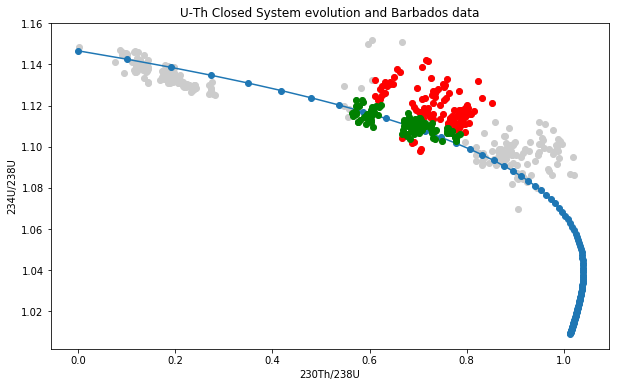

In [102]:
U234_U238_ev = []
for i in range(0, 1000000, 10000):
    a = ((U234_U238_SW-1)*(np.exp(-L234 * i))+1)
    U234_U238_ev.append(a)

Th230_U238_ev = []
for i, j in zip(range(0, 1000000, 10000), U234_U238_ev):
    b = +(1-(np.exp(-L230*i)))+(L230/(L230-L234))*(j-1)*(1-(np.exp(-(L230-L234)*i)))
    Th230_U238_ev.append(b)

barbados_closed = barbados_mis5[barbados_mis5.d234U_i > (146.8-8)]
barbados_closed = barbados_closed[barbados_mis5.d234U_i < (146.8+8)]
b_open1 = barbados_mis5[barbados_mis5.d234U_i < (146.8-8)]
b_open2 = barbados_mis5[barbados_mis5.d234U_i > (146.8+8)]
barbados_open = pd.concat([b_open1, b_open2])
    
    
#Plotting the closed system
fig, ax = plt.subplots(figsize=(10, 6))
ax.plot(Th230_U238_ev, U234_U238_ev, marker='o')
ax.set_xlabel('230Th/238U')
ax.set_ylabel('234U/238U')
ax.set_title('U-Th Closed System evolution and Barbados data')

#Plotting the published values from Hibbert
ax.scatter(barbados['Th230_U238_act_ref'], barbados['U234_U238_act_ref'], color='0.8', zorder=1)
ax.scatter(barbados_open['Th230_U238_act_ref'], barbados_open['U234_U238_act_ref'], color='red', zorder=2)
ax.scatter(barbados_closed['Th230_U238_act_ref'], barbados_closed['U234_U238_act_ref'], color='green', zorder=3)

#### Figure 1.
The Barbados MIS 5 aged samples plotted on the closed system evolution of the U/Th isotope decay system assuming an initial 234U/238U of 1.1466 (modern seawater value).  Samples plotted include: MIS 5e data that I treated as closed system (green) MIS 5e data open system corrected by methods described in Thompson et al., 2003 (red); other coral samples that are not 5e age (after correction) (grey). 

### Calculating Uplift
To create a sea level curve, we must correct the elevation of the sea level inidcator (in this case, corals), for any uplift or subsidence the land has experienced since the deposition/formation of the sea level indicators.  Barbados is an uplifting island, but uplift rates are largely calculated by the elevation of the Last Interglacial terrace (MIS 5e terrace).  This creates a 'circular logic' issue, since we reconstruct sea level from the uplift but the uplift depends on the elevation of a sea level indicator.  

The highstand for the Last Interglacial has been constrained from sites worldwide to fall somewhere between 6 to 9 m above modern sea level.  For this project, I create a sea level curve assuming four eustatic sea levels for the Last Interglacial: 6, 7, 8, and 9 m above modern sea level.  This assumption yields different uplift rates, and therefore different elevations for the MIS 5a and 5c highstands (which were not above modern sea level). 

The uplift on Barbados has been constant over the past 150 kyrs, but each section of the island experiences different rates of uplift (due to the subduction and tectonics of the region).  I therefore choose to treat the west coast and south coast samples differently, and calculate different uplift rates for each sector of the island.

- Plot the location of MIS 5 samples on the island of Barbados (Figure 2)
- Assign each sample a coast parameter (W or S)
- Split the island into west coast and south coast dataframes
- Re-assign/overwrite the terrace classification (the Hibbert dataset was never meant to be imported to code, and therefore the terrace classification has extra information included.  This means that samples from the same terrace may be treated as different terraces by groupby).  This step was done manually by visually inspecting the dataset and replacing values
- Calculate the average age and elevation of the MIS 5e terrace
- Plot the average age and elevation of each terrace and the MIS 5e terrace for both the west and south coasts.  This gives a rough generalized idea of the cross sectional morphology of the island (Figure 3)
- With the MIS 5e terrace average elevation and age, calculate the uplift in each sector of the island assuming my four assumptions of eustatic sea level at the time 

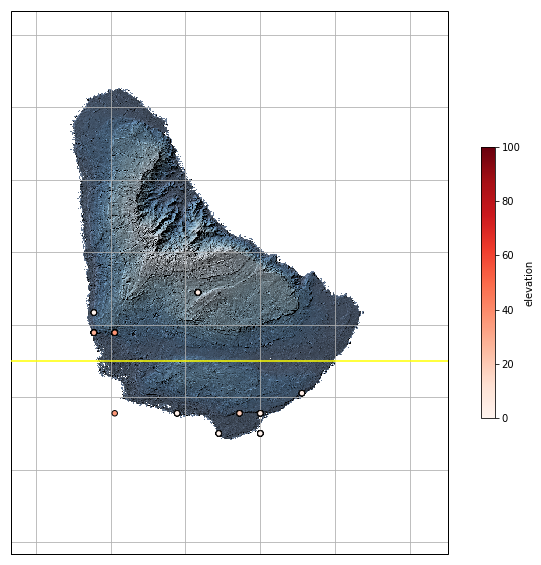

In [103]:
#Plot Barbados
plt.figure(figsize=(12,10))
ax = plt.subplot(projection=ccrs.LambertCylindrical())
ax.set_extent([-59.35, -59.7, 12.95, 13.4], ccrs.PlateCarree())

#Add Barbados DEM
fname = 'barbados.tiff'
img_extent = [-59.8840, -59.1133,  13.371195, 12.95325]
img = plt.imread(fname)
ax.imshow(img, extent=img_extent, transform=ccrs.PlateCarree(), zorder=1)

#Add map features
ax.gridlines(zorder=2)
ax.plot([-59.35, -59.7], [13.11, 13.11], transform=ccrs.PlateCarree(), zorder=10, color='yellow')

#Add sample locations
im = ax.scatter(x=barbados_mis5['dec_lon'], y=barbados_mis5['dec_lat'], c=barbados_mis5['elevation'], transform=ccrs.Geodetic(), 
                cmap='Reds', edgecolor='k', s=30, zorder=3, vmin=0, vmax=100)
cbar = plt.colorbar(im, shrink=0.5)
cbar.set_label('elevation', rotation=90)


In [116]:
#West and south coast characterization
coast = []
for index, row in barbados_mis5.iterrows():
    if row['dec_lat'] >= 13.1100:
        coast.append('W')
    elif row['dec_lat'] < 13.1100:
        coast.append('S')

bindex_mis5 = barbados.index.tolist()
barbados_mis5['Coast'] = pd.Series(coast, index=bindex_mis5)

#Create new dataframes for the south and west coasts
Sbarbados_mis5 = barbados_mis5[barbados_mis5.Coast == 'S']
Wbarbados_mis5 = barbados_mis5[barbados_mis5.Coast == 'W']


ValueError: Length of passed values is 215, index implies 482

In [112]:
barbados_mis5.shape

(215, 36)

In [45]:
south_terr = Sbarbados_mis5.groupby('terrace')

for key, group in south_terr:
    print(key)

"first terrace above present sea level" (ref 9)
Last Interglacial; not specified (ref 68)
Rendezvous Hill
Rendezvous Hill Terrace
T-1a
T-2
Ventnor


In [46]:
#Replace the terrace classifications to standard terraces.  This was done qualitatively and required me to manually rename them
rep_S = ['First Terrace', 'Rendezvous Hill', 'Rendezvous Hill', 'Rendezvous Hill', 'Worthing', 'Ventnor', 'Ventnor']

rep_dic_S = {}
for ((key, group), i) in zip(south_terr, range(0, len(rep_S))):
    rep_dic_S.update({key:rep_S[i]})

for key, group in south_terr:
    for i in range(0, Sbarbados_mis5.shape[0]):
        if Sbarbados_mis5.iloc[i, Sbarbados_mis5.columns.get_loc('terrace')] == key:
            Sbarbados_mis5.iloc[i, Sbarbados_mis5.columns.get_loc('terrace')] = rep_dic_S[key]
    

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [47]:
west_terr = Wbarbados_mis5.groupby('terrace')
for key, group in west_terr:
    print(key)

 'Last interglacial terrace - LOWER' (ref 5); Rendezvous Hill subunit rh1 (ref 4)
 'Last interglacial terrace - MIDDLE' (ref 5); Rendezvous Hill subunit rh3 (ref 4)
'Last interglacial terrace - TOP' (ref 5); Rendezvous Hill subunit rh4 (ref 4)
'Last interglacial terrace - TOP' (ref 5); Rendezvous Hill subunit rh5 (ref 4)
Barbados I (aka Worthing terrace cf. Bender et al 1979)
Barbados I, Worthing Terrace
Barbados II (aka Ventnor terrace cf. Bender et al., 1979)
Barbados II, Ventnor Terrace
Barbados III (ref 7)
Last interglacial terrace - TOP' (ref 5); Rendezvous Hill subunit rh5 (ref 4)
Last interglacial terrace, middle (ref 5); Rendezvous Hill subunit rh2 (ref 4)
Last interglacial terrace, middle (ref 5); Rendezvous Hill subunit rh5 (ref 4)
N1 (wave cut platform)
N1? (wave cut platform)
N2?
N3?
Rendezvous Hill
Rendezvous Hill Terrace
Rendezvous Hill terrace, subunit rh5
Rendezvous Terrace
Site OC (ref 5)
Ventnor Terrace
Worthing 
Worthing Terrace
last Interglacial terrace - MIDDLE'
la

In [48]:
#Replace the terrace classifications to standard terraces.  This was done qualitatively and required me to manually rename them
west_terr = Wbarbados_mis5.groupby('terrace')

rep_W = ['Rendezvous Hill (Low)', 'Rendezvous Hill (Middle)', 'Rendezvous Hill(Top)', 'Rendezvous Hill (Top)', 'Worthing', 'Worthing',
        'Ventnor', 'Ventnor', 'Rendezvous Hill', 'Rendezvous Hill (Top)', 'Rendezvous Hill (Middle)', 'Rendezvous Hill (Middle)', 'Batts Rock 1',
        'Batts Rock 1', 'Batts Rock 2', 'Batts Rock 3', 'Rendezvous Hill', 'Rendezvous Hill', 'Rendezvous Hill', 'Rendezvous Hill', 'Site OC',
        'Ventnor', 'Worthing', 'Worthing', 'Rendezvous Hill (Middle)', 'Rendezvous Hill (Middle)', 'Other terrace 1', 'Rendezvous Hill (Top)',
        'Rendezvous Hill (Top)']

rep_dic_W = {}
for ((key, group), i) in zip(west_terr, range(0, len(rep_W))):
    rep_dic_W.update({key:rep_W[i]})

for key, group in west_terr:
    for i in range(0, Wbarbados_mis5.shape[0]):
        if Wbarbados_mis5.iloc[i, Wbarbados_mis5.columns.get_loc('terrace') ] == key:
            Wbarbados_mis5.iloc[i, Wbarbados_mis5.columns.get_loc('terrace')] = rep_dic_W[key]
   

/opt/conda/lib/python3.6/site-packages/pandas/core/indexing.py:543: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  self.obj[item] = s


In [49]:
#Original terrace classification
av_ageS = Sbarbados_mis5.groupby('terrace').age_ka.mean()
av_eleS = Sbarbados_mis5.groupby('terrace').elevation.mean()
av_ageW = Wbarbados_mis5.groupby('terrace').age_ka.mean()
av_eleW = Wbarbados_mis5.groupby('terrace').elevation.mean()


#for terraces that have an average age of 122 to 130, average their elevation and age independently for the west and south coasts
#these will be the MIS5e average terrace elevation and age
mis5e_terr = ['Rendezvous Hill', 'Rendezvous Hill (Top)', 'Rendezvous Hill (Middle)', 'Rendezvous Hill (Low)']
W_mis5e = Wbarbados_mis5[Wbarbados_mis5.terrace.isin(mis5e_terr)]
S_mis5e = Sbarbados_mis5[Sbarbados_mis5.terrace.isin(mis5e_terr)] 

Wmis5e_av_age = W_mis5e.age_ka.mean()
Wmis5e_av_ele = W_mis5e.elevation.mean()
Smis5e_av_age = S_mis5e.age_ka.mean()
Smis5e_av_ele = S_mis5e.elevation.mean()

Text(0.5,1,'West Barbados average terrace age and elevation')

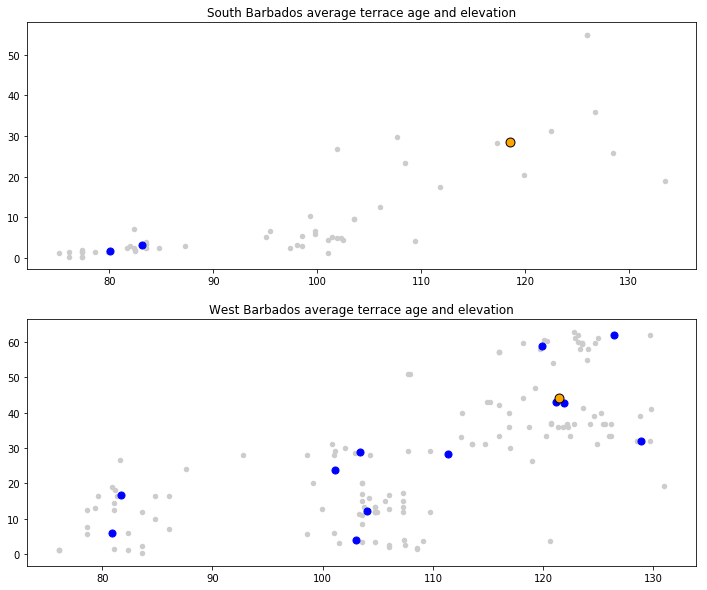

In [78]:
#Plot - Age vs. Elevation
fig, ax = plt.subplots(nrows=2, figsize=(12,10))
ax1, ax2 = ax

#Subplot - South coast
ax1.scatter(av_ageS, av_eleS, zorder=2, s=50, color='blue')
ax1.scatter(Sbarbados_mis5['age_ka'], Sbarbados_mis5['elevation'], color='0.8', s=20, zorder=1)
ax1.scatter(Smis5e_av_age, Smis5e_av_ele, zorder=3, color='orange', s=80, edgecolor='k')
ax1.set_title('South Barbados average terrace age and elevation')

#Subplot - West coast
ax2.scatter(av_ageW, av_eleW, zorder=2, s=50, color='blue')
ax2.scatter(Wbarbados_mis5['age_ka'], Wbarbados_mis5['elevation'], color='0.8', s=20, zorder=1)
ax2.scatter(Wmis5e_av_age, Wmis5e_av_ele, zorder=3, color='orange', s=80, edgecolor = 'k')
ax2.set_title('West Barbados average terrace age and elevation')

In [61]:
#Assuming 6m eustatic, uplift rate calculation
Wuplift_6eust = (Wmis5e_av_ele - 6)/Wmis5e_av_age
Suplift_6eust = (Smis5e_av_ele - 6)/Smis5e_av_age

Wuplift_7eust = (Wmis5e_av_ele - 7)/Wmis5e_av_age
Suplift_7eust = (Smis5e_av_ele - 7)/Smis5e_av_age

Wuplift_8eust = (Wmis5e_av_ele - 8)/Wmis5e_av_age
Suplift_8eust = (Smis5e_av_ele - 8)/Smis5e_av_age

Wuplift_9eust = (Wmis5e_av_ele - 9)/Wmis5e_av_age
Suplift_9eust = (Smis5e_av_ele - 9)/Smis5e_av_age


SL_scenario_array = np.array([['6m eustatic', Wuplift_6eust, Suplift_6eust],
                             ['7m eustatic', Wuplift_7eust, Suplift_7eust],
                             ['8m eustatic', Wuplift_8eust, Suplift_8eust],
                             ['9m eustatic', Wuplift_9eust, Suplift_9eust]])



### Sea Level Curves
With the four uplift rates, we can calcuate four sea level curves under the four potential eustatic sea level parameters.  

(215, 4)

In [88]:
#Full MIS 5 Barbados dataset sea level curve 

SL_6eust = []
SL_7eust = []
SL_8eust = []
SL_9eust = []
for index, row in barbados_mis5.iterrows():
    if row['Coast'] == 'W':
        s1 = row['elevation'] - (row['age_ka']*Wuplift_6eust)
        s2 = row['elevation'] - (row['age_ka']*Wuplift_7eust)
        s3 = row['elevation'] - (row['age_ka']*Wuplift_8eust)
        s4 = row['elevation'] - (row['age_ka']*Wuplift_9eust)
        SL_6eust.append(s1)
        SL_7eust.append(s2)
        SL_8eust.append(s3)
        SL_9eust.append(s4)
    elif row['Coast'] == 'S':
        s1 = row['elevation'] - (row['age_ka']*Suplift_6eust)
        s2 = row['elevation'] - (row['age_ka']*Suplift_7eust)
        s3 = row['elevation'] - (row['age_ka']*Suplift_8eust)
        s4 = row['elevation'] - (row['age_ka']*Suplift_9eust)
        SL_6eust.append(s1)
        SL_7eust.append(s2)
        SL_8eust.append(s3)
        SL_9eust.append(s4)


In [77]:
#Create sea level data frame under the four scenarios
data = {'SL_6eust': SL_6eust, 'SL_7eust': SL_7eust,
       'SL_8eust': SL_8eust, 'SL_9eust': SL_9eust}
bindex = barbados_mis5.index.tolist()
SL = pd.DataFrame(data, index=bindex)

#Join the SL scenario data to the main dataframe
barbados_mis5 = barbados_mis5.join(SL)

ValueError: Shape of passed values is (4, 215), indices imply (4, 430)

In [76]:
SL

,SL_6eust,SL_7eust,SL_8eust,SL_9eust
78,NaN,NaN,NaN,NaN
79,20.567160,21.552458,22.537756,23.523054
80,-8.050945,-7.023056,-5.995166,-4.967276
81,19.428944,20.444202,21.459461,22.474719
82,19.186904,20.208533,21.230162,22.251791
100,-14.135303,-13.447375,-12.759448,-12.071521
101,-11.811025,-11.157955,-10.504885,-9.851815
102,-3.381410,-2.660683,-1.939956,-1.219229
105,9.702628,10.684361,11.666093,12.647826
111,17.319412,18.205944,19.092477,19.979009


In [71]:
#Average SL and age for each terrace under each condition
ter_age = barbados_mis5.groupby('terrace').age_ka.mean()
ter_SL_6eust = barbados_mis5.groupby('terrace').SL_6eust.mean()
ter_SL_7eust = barbados_mis5.groupby('terrace').SL_7eust.mean()
ter_SL_8eust = barbados_mis5.groupby('terrace').SL_8eust.mean()
ter_SL_9eust = barbados_mis5.groupby('terrace').SL_9eust.mean()

fig, ax = plt.subplots(ncols=2, nrows=2, figsize=(12,10))
ax1, ax2, ax3, ax4 = ax

#plot 6 eustatic scenario SL curve
ax1.scatter(barbados_mis5.age_ka, barbados_mis5.SL_6eust, color='0.8')
ax1.scatter(ter_age, ter_SL_6eust)
ax1.set_title('Sea level curve ___ uplift (6m eustatic)')

#plot 7 eustatic scenario SL curve
ax2.scatter(barbados_mis5.age_ka, barbados_mis5.SL_7eust, color='0.8')
ax2.scatter(ter_age, ter_SL_7eust)
ax2.set_title('Sea level curve ___ uplift (7m eustatic)')

#plot 8 eustatic scenario SL curve
ax3.scatter(barbados_mis5.age_ka, barbados_mis5.SL_8eust, color='0.8')
ax3.scatter(ter_age, ter_SL_8eust)
ax3.set_title('Sea level curve ___ uplift (8m eustatic)')

#plot 9 eustatic scenario SL curve
ax4.scatter(barbados_mis5.age_ka, barbados_mis5.SL_9eust, color='0.8')
ax4.scatter(ter_age, ter_SL_9eust)
ax4.set_title('Sea level curve ___ uplift (9m eustatic)')

AttributeError: 'DataFrameGroupBy' object has no attribute 'SL_9eust'

In [ ]:
#Moderately filtered dataset (d234initial is closed system ONLY)
bmis5_mfilt = barbados[barbados.d234U_i >= (146.8-8)]
bmis5_mfilt = bmis5_mfilt[barbados_mis5.age_ka <= (146.8+8)]


In [ ]:
#Heavily filtered dataset 
#lat/lon is NOT estimated, elevation in the original reference = elevation used, 
#corals in growth position and in situ, low/no 232Th, d234 initial is closed system